In [1]:
#Importo le librerie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Leggo il file excel dei posti letto facendolo diventare csv
csv = pd.read_csv('C_17_dataset_18_0_upFile.csv', sep=';' , encoding='ISO-8859-1')
csv.rename(columns = {'Descrizione Regione':'Regione'}, inplace = True)

#Vediamo i dati con i relativi tipi
print (csv.head())
print (csv.dtypes)

#Lista con posti letto relativi al 2014
csv2014 = csv[csv['Anno'] == 2014]#.groupby('Regione')
beds2014 = csv2014['Totale posti letto']

print(beds2014.describe())

   Anno  Codice Regione   Regione  Codice Azienda  Tipo Azienda  \
0  2010              10  PIEMONTE             201             1   
1  2010              10  PIEMONTE             201             1   
2  2010              10  PIEMONTE             201             1   
3  2010              10  PIEMONTE             201             1   
4  2010              10  PIEMONTE             201             1   

   Codice struttura                   Denominazione struttura  \
0             10007  OSPEDALE MARTINI                           
1             10010  OSPEDALE OFTALMICO                         
2             10012  OSPEDALE EVANGELICO VALDESE                
3             10012  OSPEDALE EVANGELICO VALDESE                
4             10612  CASA DI CURA KOELLIKER OSPEDALINO          

                                  Indirizzo  Codice Comune  \
0  VIA TOFANE                                         1272   
1  VIA JUVARRA FILIPPO                                1272   
2  VIA PELLICO SILVI

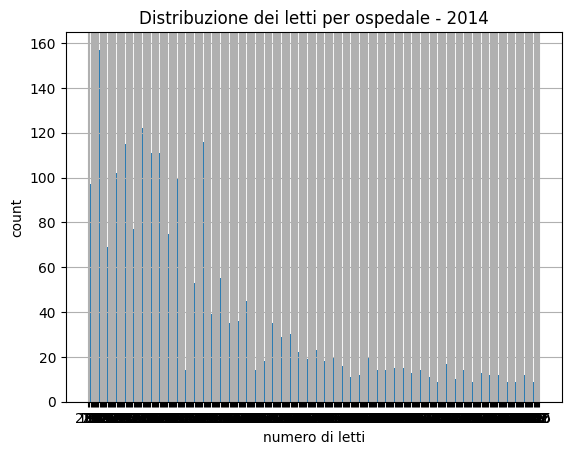

In [12]:
#primo istogramma
histo = beds2014.hist(bins=50)
histo.set_title("Distribuzione dei letti per ospedale - 2014")
histo.set_xlabel("numero di letti")
histo.set_ylabel("count")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

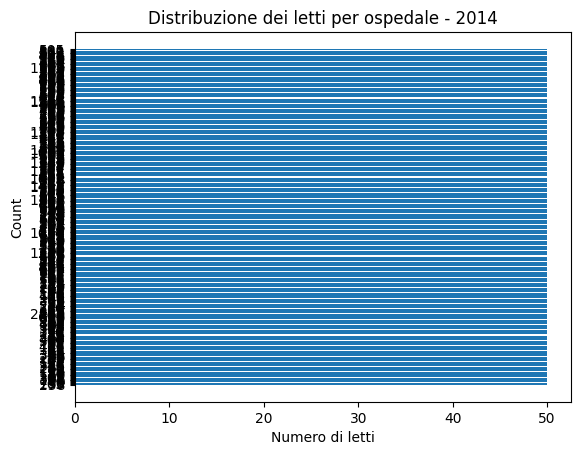

In [3]:
plt.barh(beds2014,width=50)
plt.title("Distribuzione dei letti per ospedale - 2014")
plt.xlabel("Numero di letti")
plt.ylabel("Count")
plt.show

In [4]:
#stampa in ordine decrescente di posti letto
csv2014 = csv2014.sort_values('Totale posti letto', ascending = False)
print(csv2014[['Denominazione struttura', 'Comune' ,'Totale posti letto']])

                       Denominazione struttura  \
8924  OSPEDALE DELLE COLLINE DELL'ALBEGNA        
9386  'CASA DI CURA PROF.DOTT. LUIGI COBELLIS'   
8849  SOL ET SALUS                               
8088  CASA DI CURA CITTA' DI BRA                 
9028              CENTRO OSPEDALIERO S.STEFANO   
...                                        ...   
8814  OSPEDALE "SANTA MARIA DELLE CROCI" RAVEN   
8047  OSPEDALE UNICO DEL VERCELLESE              
7988  OSPEDALE MARIA VITTORIA                    
8077  PRESIDIO UNIFICATO SAVIGLIANO-SALUZZO CN   
8835  OSPEDALE PRIVATO "SAN PIER DAMIANO HOSPI   

                                        Comune Totale posti letto  
8924  ORBETELLO                                                99  
9386  VALLO DELLA LUCANIA                                      99  
8849  RIMINI                                                   99  
8088  BRA                                                      99  
9028  POTENZA PICENA                                       

<Axes: ylabel='Regione'>

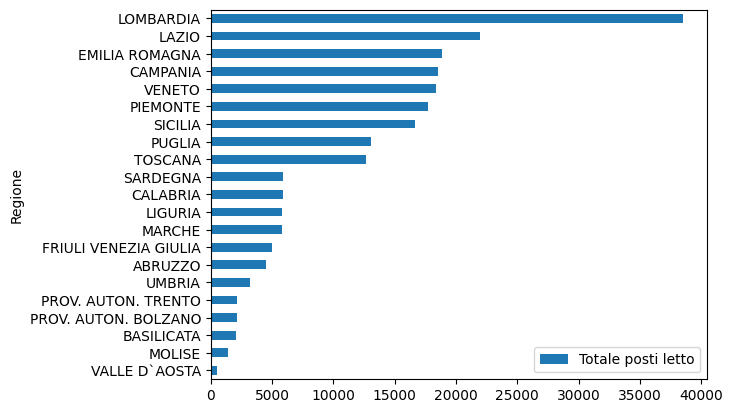

In [5]:
#Costruzione bar plot by posti letto per comune
csv2014["Totale posti letto"] = csv2014["Totale posti letto"].astype(int)
bedsByRegione = csv2014[['Regione', 'Totale posti letto']].groupby('Regione')#groupby() permette di creare tanti gruppi a seconda del campo passato come parametri
summedAndSorted = bedsByRegione.sum().sort_values('Totale posti letto')
summedAndSorted.plot.barh()
#plt.show()   non lo uso perché è un metodo di un'altra libreria

Carichiamo un dataset della popolazione del 2014 e incrociamolo con quello dei posti letto

   Codice regione   Regione Età    Sesso  Popolazione
0             1.0  PIEMONTE   0   Totale      28544.0
1             1.0  PIEMONTE   0   Maschi      14656.0
2             1.0  PIEMONTE   0  Femmine      13888.0
3             1.0  PIEMONTE   1   Totale      29793.0
4             1.0  PIEMONTE   1   Maschi      15269.0
------
Codice regione    float64
Regione            object
Età                object
Sesso              object
Popolazione       float64
dtype: object


<Axes: ylabel='Regione'>

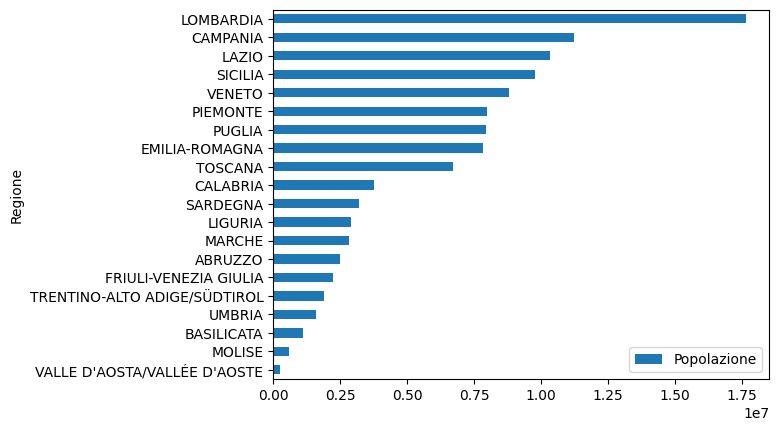

In [7]:
csv2 = pd.read_csv('Ricostruzione della popolazione 2002-2019.csv', sep=';', encoding='ISO-8859-1')

csv2.infer_objects()  #deduce il tipo delle colonne e lo adatta
csv2['Regione'] = csv2['Regione'].str.upper()

#Ritorna i primi elementi di un dataset(default: 5)
print (csv2.head())
print("------")
#Ritorna i tipi dei vari attributi
print (csv2.dtypes)

#Lista di popolazioni per regione nel 2019 + istogramma descrittivo
popolazione2014byreg = csv2[['Regione', 'Popolazione']].groupby('Regione')
pop_sumnsrt = popolazione2014byreg.sum().sort_values('Popolazione')
pop_sumnsrt.plot.barh()

In [8]:
srtpop = pop_sumnsrt.sort_values('Regione')
srtpl = summedAndSorted.sort_values('Regione')
print(srtpop)
print(srtpl)

                              Popolazione
Regione                                  
ABRUZZO                         2492848.0
BASILICATA                      1117526.0
CALABRIA                        3750240.0
CAMPANIA                       11225028.0
EMILIA-ROMAGNA                  7822810.0
FRIULI-VENEZIA GIULIA           2238450.0
LAZIO                          10344314.0
LIGURIA                         2889902.0
LOMBARDIA                      17632118.0
MARCHE                          2813336.0
MOLISE                           605736.0
PIEMONTE                        7993334.0
PUGLIA                          7937012.0
SARDEGNA                        3221460.0
SICILIA                         9763806.0
TOSCANA                         6726638.0
TRENTINO-ALTO ADIGE/SÜDTIROL    1911494.0
UMBRIA                          1588318.0
VALLE D'AOSTA/VALLÉE D'AOSTE     237822.0
VENETO                          8805310.0
                       Totale posti letto
Regione                           

In [9]:
#Soprannomino le regioni del secondo df con gli stessi nomi del primo così da poterli incrociare poi
srtpl.loc['TRENTINO-ALTO ADIGE/SÜDTIROL'] = 2106+2132
srtpl.loc['EMILIA-ROMAGNA'] = 18876
srtpl.loc['FRIULI-VENEZIA GIULIA'] = 5028
srtpl.loc["VALLE D'AOSTA/VALLÉE D'AOSTE"] = 517
srtpl = srtpl.drop('PROV. AUTON. BOLZANO')
srtpl = srtpl.drop('PROV. AUTON. TRENTO')
srtpl = srtpl.drop('EMILIA ROMAGNA')
srtpl = srtpl.drop("VALLE D`AOSTA")
srtpl = srtpl.drop('FRIULI VENEZIA GIULIA')
srtpl.sort_values('Regione')
srtpop.sort_values('Regione')
print(srtpl)
print(srtpop)

                              Totale posti letto
Regione                                         
ABRUZZO                                     4483
BASILICATA                                  2029
CALABRIA                                    5857
CAMPANIA                                   18504
LAZIO                                      21955
LIGURIA                                     5833
LOMBARDIA                                  38519
MARCHE                                      5772
MOLISE                                      1422
PIEMONTE                                   17703
PUGLIA                                     13046
SARDEGNA                                    5924
SICILIA                                    16689
TOSCANA                                    12619
UMBRIA                                      3164
VENETO                                     18400
TRENTINO-ALTO ADIGE/SÜDTIROL                4238
EMILIA-ROMAGNA                             18876
FRIULI-VENEZIA GIULI

In [10]:
frame = [srtpl, srtpop]
df_join = srtpl.join(srtpop)
df_join

,Totale posti letto,Popolazione
Regione,,
ABRUZZO,4483,2492848.0
BASILICATA,2029,1117526.0
CALABRIA,5857,3750240.0
CAMPANIA,18504,11225028.0
LAZIO,21955,10344314.0
LIGURIA,5833,2889902.0
LOMBARDIA,38519,17632118.0
MARCHE,5772,2813336.0
MOLISE,1422,605736.0


                              Totale posti letto  Popolazione  Rapporto
Regione                                                                
ABRUZZO                                     4483    2492848.0  0.001798
BASILICATA                                  2029    1117526.0  0.001816
CALABRIA                                    5857    3750240.0  0.001562
CAMPANIA                                   18504   11225028.0  0.001648
LAZIO                                      21955   10344314.0  0.002122
LIGURIA                                     5833    2889902.0  0.002018
LOMBARDIA                                  38519   17632118.0  0.002185
MARCHE                                      5772    2813336.0  0.002052
MOLISE                                      1422     605736.0  0.002348
PIEMONTE                                   17703    7993334.0  0.002215
PUGLIA                                     13046    7937012.0  0.001644
SARDEGNA                                    5924    3221460.0  0

<Axes: ylabel='Regione'>

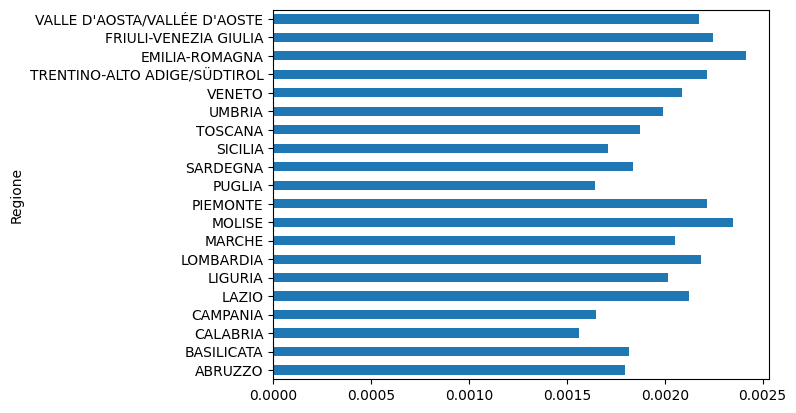

In [11]:
ratio = pd.DataFrame(df_join)
ratio['Rapporto'] = df_join['Totale posti letto']/df_join['Popolazione']
print(ratio)
ratio['Rapporto'].plot.barh()
#plt.show()